In [1]:
### Project Topic

# The purpose of this project is to classify breast cancer tumors as (benin or malignant).
# This project will be using a simple multi-linear regression model.
# Data source would come from the University of California, Irvine.
# This project would help doctors and physicians who have trouble classifying cancer tumors as Benign or malignant


In [2]:
### Data

# The data consist of an ID number, Diagnosis (M=malignant, B=Benign), and 30 features (tumor radius, texture, area, smoothness...) 
# 569 subjects would be used for this exercise.

# Data was obtained from UCI's machine learning repository 
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score


# Replace file_path with location of data.csv
file_path = r'C:\Users\Eddie\Desktop\Engineering\wdbc_wheaders.csv'
df = pd.read_csv(file_path)

In [3]:
### Data Cleaning - Display DF sample

# Data is initially .data file. File is processed externaly to add headers and convert to a csv file.
# Realized data would be 570 x 32 matrix. A total of 30 features and 569 samples.
# Data is clean and does not require much processing. None of the data has NAN and data is label in an appropriate category.
# Only the diagnosis is cleaned to convert Benign to 0 and Malignant to 1.

#             ID    DIAGNOSIS   RADIUS1   TEXTURE1   PERIMETER1 ... FRACTAL_DIMENSION3
# SUBJECT0   
# SUBJECT1  
# SUBJECT2   
# SUBJECT3   
#   ...
# SUBJECT568  


print(df.head()) # Display df




         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1         ...          radius3  \
0       0.27760      0.3001          0.14710         ...            25.38   
1       0.07864      0.0869          0.07017         ...            24.99   
2       0.15990      0.1974          0.12790         ...            23.57   
3       0.28390      0.2414          0.10520         ...            14.91   
4       0.13280      0.1980          0.10430         ...            22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \


In [4]:
### Data Cleaning - Display DF features

print(df.info()) # Display features



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                    569 non-null int64
Diagnosis             569 non-null object
radius1               569 non-null float64
texture1              569 non-null float64
perimeter1            569 non-null float64
area1                 569 non-null float64
smoothness1           569 non-null float64
compactness1          569 non-null float64
concavity1            569 non-null float64
concave_points1       569 non-null float64
symmetry1             569 non-null float64
factal_dimension1     569 non-null float64
radius2               569 non-null float64
texture2              569 non-null float64
perimeter2            569 non-null float64
area2                 569 non-null float64
smoothness2           569 non-null float64
compactness2          569 non-null float64
concavity2            569 non-null float64
concave_points2       569 non-null float64
symmetry2             569 non-null flo

In [5]:
### Data Cleaning - Display Benign Count and Malignant Count

diagnosis_counts = df['Diagnosis'].value_counts()
benign_count = diagnosis_counts['B']
malignant_count = diagnosis_counts['M']

print("Benign Count:", benign_count)
print("Malignant Count:", malignant_count)

df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})


Benign Count: 357
Malignant Count: 212


In [6]:
### Exploratory Data Analysis - display correlation matrix


df.corr()

## By observation of the correlation matrix it looks like radius, perimeter, and concave points are the most significant features.


,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
ID,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
Diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius1,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


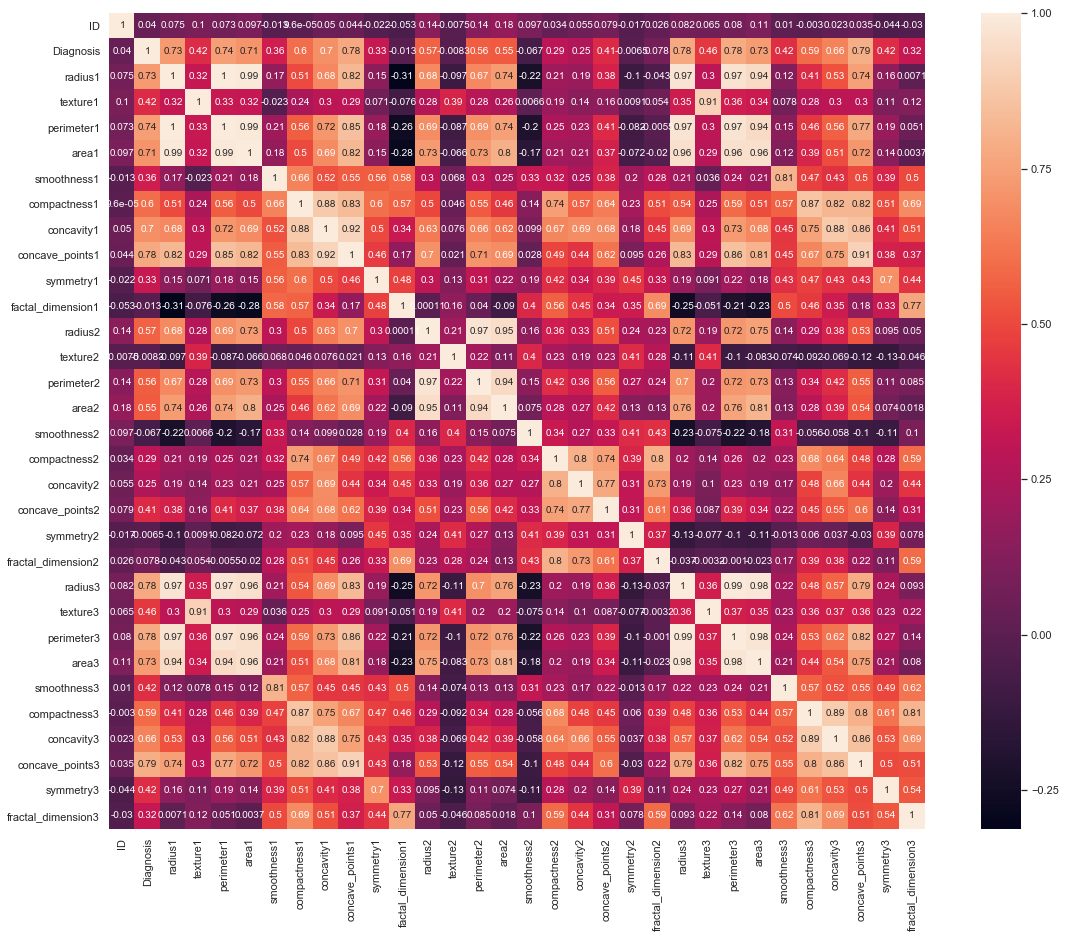

In [7]:
### Exploratory Data Analysis - display heatmap matrix
# Looking at the heatmap it also appears the following features are colinear
# due to their high correlation values: radius1 perimeter1, area1, radius3, perimeter3, and area3.

plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, square=True, xticklabels=True, cbar=True)

In [8]:
### Models - Strongest Indicator
# Using only concave_points3 the strongest indicator as the only indicator we can get an R-squared value of 0.72

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_r_squared = 0
max_deg = 10
formula = 'Diagnosis ~ concave_points3'
model = smf.ols(formula, data=df).fit()

print("Degree:  1",  model.rsquared)

for deg in range(2,max_deg +1):
    formula += f' + np.power(concave_points3,{deg})'
    model = smf.ols(formula, data=df).fit()
    print("Degree: ", deg, model.rsquared)
    if(model.rsquared_adj > best_r_squared):
        best_formula = formula
        best_model = model
        best_r_squared = best_model.rsquared_adj
        best_degree = deg
        
formula_strongest_ind = 'Diagnosis ~ concave_points3 + np.power(concave_points3,2) + np.power(concave_points3, 3)'


Degree:  1 0.6297470235614584
Degree:  2 0.6309352699330446
Degree:  3 0.7033610378146713
Degree:  4 0.7033900659916137
Degree:  5 0.7202997951788024
Degree:  6 0.7204212156055667
Degree:  7 0.7242914692809307
Degree:  8 0.7242967644841682
Degree:  9 0.725312356224284
Degree:  10 0.7253858093393647


In [9]:
### Models - Multilinear 
# Using backwards elimination of features and additional volume features, we can get an R-squared value of 0.80
# Added volume features that may be impactful.

df['AR1'] = df['radius1']*df['area1']
df['AR2'] = df['radius2']*df['area2']
df['AR3'] = df['radius3']*df['area3']
df['R1cube'] = df['radius1']*df['radius1']*df['radius1']
df['R2cube'] = df['radius2']*df['radius2']*df['radius2']
df['R3cube'] = df['radius3']*df['radius3']*df['radius3']
df['strong_ind'] = np.power(df['concave_points3'], 3) 

features = list(df.columns)
features.remove('Diagnosis')
features.remove('ID')

formula = f"Diagnosis ~ {' + '.join(features)}"
psiglevel = 0.01
while True:
    model = smf.ols(formula, data=df).fit()
    max_pvalue = model.pvalues[1:].max()
    if max_pvalue > psiglevel and model.pvalues[1:].idxmax()[:] != 'Intercept':
        feature_to_remove = model.pvalues[1:].idxmax()[:]
        features.remove(feature_to_remove)
        formula = f"Diagnosis ~ {' + '.join(features)}"
    else:
        break
        
Backwards_Formula = formula
print("Backwards Formula:", Backwards_Formula)
print("Rsquared:", model.summary())
print("Rsquared:", model.rsquared)





Backwards Formula: Diagnosis ~ perimeter1 + area1 + concavity1 + smoothness2 + concavity2 + concave_points2 + radius3 + texture3 + compactness3 + symmetry3 + AR1 + R3cube
Rsquared:                             OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.10e-185
Time:                        00:07:37   Log-Likelihood:                 64.121
No. Observations:                 569   AIC:                            -102.2
Df Residuals:                     556   BIC:                            -45.77
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef   

In [12]:
### Models - Strongest Indicators
# Using only concave_points3 the strongest indicator as the only indicator we can get an R-squared value of 0.74

features = list(df.columns)
features.remove('Diagnosis')
features.remove('ID')

best = ['',0]
best_features = []
x_train, x_test = train_test_split(df, train_size=0.2, random_state=10)

for p in features:
    model  = smf.ols(formula='Diagnosis~'+p, data=x_train).fit()
    if model.rsquared>best[1]:
        best = [p, model.rsquared]

best_features.append(best[0])
features.remove(best[0])

for i in range(4):

    for p in features:
        formula = f'Diagnosis ~ {" + ".join(best_features)} + {p}'
        model  = smf.ols(formula, data=x_train).fit()
        if model.rsquared>best[1]:
            best = [p, model.rsquared]
    best_features.append(best[0])
    features.remove(best[0])
        
        
        
formula_best_features = f'Diagnosis ~ {" + ".join(best_features)} + {p}'
print("Best Featues formula: ", formula_best_features )
print("Rsquared:", model.summary())
print("Rsquared:", model.rsquared)


Best Featues formula:  Diagnosis ~ concave_points3 + texture3 + radius3 + R3cube + smoothness3 + strong_ind
Rsquared:                             OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     63.72
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.66e-30
Time:                        00:08:37   Log-Likelihood:                -1.1708
No. Observations:                 113   AIC:                             14.34
Df Residuals:                     107   BIC:                             30.71
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------

In [13]:
#  Results 
x_train, x_test = train_test_split(df, train_size=0.2, random_state=10)


train_model_strongest_ind = smf.ols(formula=formula_strongest_ind, data=x_train).fit()
model_strongest_ind = smf.ols(formula=formula_strongest_ind, data=x_test).fit()
y_pred_strongest_ind = train_model_strongest_ind.predict(x_test)
fpr_strongest_ind, tpr_strongest_ind, _ = roc_curve(x_test['Diagnosis'], y_pred_strongest_ind)
roc_auc_strongest_ind = auc(fpr_strongest_ind, tpr_strongest_ind)
y_pred_binary_strongest_ind = (y_pred_strongest_ind > 0.5).astype(int)
f1_strongest_ind = f1_score(x_test['Diagnosis'], y_pred_binary_strongest_ind)

print("Strongest Ind - formula: ", formula_strongest_ind)
print("Strongest Ind - ADJ Rsquared:", model_strongest_ind.rsquared_adj)
print("Strongest Ind - ROC-AUC Strongest Ind:", roc_auc_strongest_ind)
print("Strongest Ind - F1 Score Strongest Ind:", f1_strongest_ind)





train_model_backwards = smf.ols(formula=Backwards_Formula, data=x_train).fit()
model_backwards = smf.ols(formula=Backwards_Formula, data=x_test).fit()
y_pred_backwards = train_model_backwards.predict(x_test)
fpr_backwards, tpr_backwards, _ = roc_curve(x_test['Diagnosis'], y_pred_backwards)
roc_auc_backwards = auc(fpr_backwards, tpr_backwards)
y_pred_binary_backwards = (y_pred_backwards > 0.5).astype(int)
f1_backwards = f1_score(x_test['Diagnosis'], y_pred_binary_backwards)

print ('\n')
print("Backwards Refinement - formula: ", Backwards_Formula)
print("Backwards Refinement - ADJ Rsquared:", model_backwards.rsquared_adj)
print("Backwards Refinement - ROC-AUC Backwards:", roc_auc_backwards)
print("Backwards Refinement - F1 Score Backwards:", f1_backwards)




train_model_best_features = smf.ols(formula=formula_best_features, data=x_train).fit()
model_best_features = smf.ols(formula=formula_best_features, data=x_test).fit()
y_pred_best_features = train_model_best_features.predict(x_test)
fpr_best_features, tpr_best_features, _ = roc_curve(x_test['Diagnosis'], y_pred_best_features)
roc_auc_best_features = auc(fpr_best_features, tpr_best_features)
y_pred_binary_best_features = (y_pred_best_features > 0.5).astype(int)
f1_best_features = f1_score(x_test['Diagnosis'], y_pred_binary_best_features)


print ('\n')
print("Forward Refinement - formula: ", formula_best_features)
print("Forward Refinement - ADJ Rsquared:", model_best_features.rsquared_adj)
print("Forward Refinement - ROC-AUC Best Features:", roc_auc_best_features)
print("Forward Refinement - F1 Score Best Features:", f1_best_features)








Strongest Ind - formula:  Diagnosis ~ concave_points3 + np.power(concave_points3,2) + np.power(concave_points3, 3)
Strongest Ind - ADJ Rsquared: 0.6978324367912714
Strongest Ind - ROC-AUC Strongest Ind: 0.960978835978836
Strongest Ind - F1 Score Strongest Ind: 0.8711656441717791


Backwards Refinement - formula:  Diagnosis ~ perimeter1 + area1 + concavity1 + smoothness2 + concavity2 + concave_points2 + radius3 + texture3 + compactness3 + symmetry3 + AR1 + R3cube
Backwards Refinement - ADJ Rsquared: 0.7915645212265836
Backwards Refinement - ROC-AUC Backwards: 0.9954117063492064
Backwards Refinement - F1 Score Backwards: 0.9473684210526314


Forward Refinement - formula:  Diagnosis ~ concave_points3 + texture3 + radius3 + R3cube + smoothness3 + strong_ind
Forward Refinement - ADJ Rsquared: 0.7402375060491297
Forward Refinement - ROC-AUC Best Features: 0.9908027447089948
Forward Refinement - F1 Score Best Features: 0.9415384615384617


In [ ]:
## Discussion and Conclusion

# Best r_squared value value is backwards refinement. It looks like even just using the polynomial concatenation of the
# strongest indicator results in a 0.96 ROC AUC

# Best formula was using the backwards refinement which resulted in an adjusted R2 of 0.79 and an ROC-AUC curve of 0.995

# Some key take-aways is that with even just the strongest indicator you can get some accurate classification of a cancerous tumor.
# In the future, this can generate an even more accurate model using a neural network.
